In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 이미지 업로드
import os


In [3]:
train_cats_dir = "../data/cats_and_dogs_filtered/train/cats/"
train_dogs_dir = "../data/cats_and_dogs_filtered/train/dogs/"
test_cats_dir = "../data/cats_and_dogs_filtered/test/cats/"
test_dogs_dir = "../data/cats_and_dogs_filtered/test/dogs/"

In [8]:
train_cat_fname = os.listdir(train_cats_dir)
print("데이터:",train_cat_fname[:3])
print("데이터 개수: ",len(train_cat_fname))

train_dog_fname = os.listdir(train_dogs_dir)
print("데이터:",train_dog_fname[:3])
print("데이터 개수: ",len(train_dog_fname))

test_cat_fname = os.listdir(test_cats_dir)
print("데이터:",test_cat_fname[:3])
print("데이터 개수: ",len(test_cat_fname))

test_dog_fname = os.listdir(test_dogs_dir)
print("데이터:",train_cat_fname[:3])
print("데이터 개수: ",len(test_dog_fname))


데이터: ['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg']
데이터 개수:  1000
데이터: ['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg']
데이터 개수:  1000
데이터: ['cat.2042.jpg', 'cat.2056.jpg', 'cat.2081.jpg']
데이터 개수:  500
데이터: ['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg']
데이터 개수:  500


In [11]:
def loadImages(defaultPath,fnames):
    images = []
    
    for i in fnames:
        #../data/cats_and_dogs_filtered/test/dogs/dogs/dog.0.jpg
        path = defaultPath+i
        images.append(plt.imread(path))
        
    return np.array(images)

In [18]:
X_trian_cats = loadImages(train_cats_dir,train_cat_fname)
print(X_trian_cats.shape)

X_train_dogs = loadImages(train_dogs_dir,train_dog_fname)
print(X_train_dogs.shape)

(1000,)
(1000,)


In [17]:
X_test_cats = loadImages(test_cats_dir,test_cat_fname)
print(X_test_cats.shape)

X_test_dogs = loadImages(test_dogs_dir,test_dog_fname)
print(X_test_dogs.shape)

(500,)
(500,)


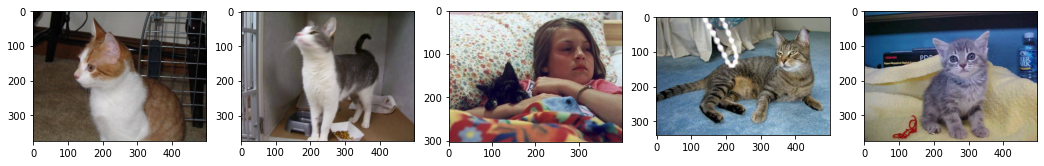

In [32]:
#이미지 데이터 확인
figure, axes = plt.subplots(nrows=1,ncols=5)
figure.set_size_inches(18,5)

axes[0].imshow(X_trian_cats[0])
axes[1].imshow(X_trian_cats[1])
axes[2].imshow(X_trian_cats[2])
axes[3].imshow(X_trian_cats[3])
axes[4].imshow(X_trian_cats[4])

In [33]:
#이미지 전처리(사이즈 조절)
from PIL import Image

In [37]:
np.array(Image.fromarray(X_train_dogs[4]).resize((224,224)))

array([[[ 55,  51,   2],
        [ 50,  45,   4],
        [ 43,  38,   2],
        ...,
        [ 16,   2,   0],
        [ 21,   3,   0],
        [ 24,   5,   1]],

       [[ 51,  47,   0],
        [ 46,  41,   2],
        [ 41,  36,   1],
        ...,
        [ 21,   6,   3],
        [ 20,   5,   1],
        [ 20,   4,   0]],

       [[ 49,  42,   0],
        [ 44,  38,   1],
        [ 40,  34,   2],
        ...,
        [ 27,  10,   6],
        [ 22,   7,   5],
        [ 19,   5,   3]],

       ...,

       [[142, 147,  57],
        [141, 146,  54],
        [142, 147,  56],
        ...,
        [ 96,  81,  12],
        [ 93,  77,  14],
        [ 87,  71,  10]],

       [[138, 143,  53],
        [141, 146,  54],
        [143, 148,  56],
        ...,
        [ 93,  78,   9],
        [ 87,  72,   8],
        [ 82,  66,   4]],

       [[140, 145,  54],
        [145, 150,  58],
        [146, 151,  59],
        ...,
        [ 95,  81,  11],
        [ 88,  72,   9],
        [ 82,  66,   5]]

In [43]:
def resizeImage(originalImages,size):
    resize_img = []
    for i in originalImages:
        resize = np.array(Image.fromarray(i).resize(size))
        resize_img.append(resize)
        
    return np.array(resize_img)

In [48]:
X_trian_cats_224 = resizeImage(X_trian_cats,(224,224))
print("train cats 데이터",X_trian_cats_224.shape)

X_trian_dogs_224 = resizeImage(X_train_dogs,(224,224))
print("train dogs 데이터",X_trian_dogs_224.shape)

X_test_cats_224 = resizeImage(X_test_cats,(224,224))
print("test cats 데이터",X_test_cats_224.shape)

X_test_dogs_224 = resizeImage(X_test_dogs,(224,224))
print("test dogs 데이터",X_test_dogs_224.shape)

train cats 데이터 (1000, 224, 224, 3)
train dogs 데이터 (1000, 224, 224, 3)
test cats 데이터 (500, 224, 224, 3)
test dogs 데이터 (500, 224, 224, 3)


In [50]:
#Xtrain 데이터 병합

X_train=np.concatenate((X_trian_cats_224,X_trian_dogs_224))
X_train.shape



(2000, 224, 224, 3)

In [51]:
X_test = np.concatenate((X_test_cats_224,X_test_dogs_224))
X_test.shape

(1000, 224, 224, 3)

In [57]:
#lable 생성

y_train = np.array([0]*1000+[1]*1000)
print(y_train[:10])
print(y_train[-10:])
print(y_train.shape)

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]
(2000,)


In [59]:
y_test = np.array([0]*500+[1]*500)
print(y_test[:10])
print(y_test[-10:])
print(y_test.shape)

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]
(1000,)


In [60]:
#CNN모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [69]:
model = Sequential()
model.add(Conv2D(filters=128,#필터 수
                kernel_size =(3,3),#필터의 크기
                activation="sigmoid",
                padding="same",#이미지의 입력과 출력의 크기를 동일하게
                input_shape=(224,224,3)))#입력데이터 크기

model.add(Conv2D(filters=128,#필터 수
                kernel_size =(3,3),#필터의 크기
                activation="sigmoid",
                padding="same"))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256,#필터 수
                kernel_size =(3,3),#필터의 크기
                activation="sigmoid",
                padding="same"))

model.add(Conv2D(filters=256,#필터 수
                kernel_size =(3,3),#필터의 크기
                activation="sigmoid",
                padding="same"))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())#1차원으로 데이터를 나열
model.add(Dense(units=128, activation="sigmoid"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss ="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,
         validation_data=(X_test,y_test),
         epochs=3)

Epoch 1/3
53/63 [========================>.....] - ETA: 2:30 - loss: 2.4452 - accuracy: 0.5053